In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [2]:
df=pd.read_csv('/content/data.csv')

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df=df.drop(columns=['Unnamed: 32'],errors='ignore')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
x= df.drop(columns=['diagnosis'],errors='ignore')
y=df['diagnosis'].map({'B':0, 'M':1})

In [6]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [10]:
pca_full=PCA()
x_pca_full = pca_full.fit_transform(x_scaled)

In [11]:
explained=pca_full.explained_variance_ratio_
cum_explained= np.cumsum(explained)

- ev--> explainced variance
- cev--> cummulative explained varainace

In [12]:
for i, (ev,cev) in enumerate(zip(explained[:10], cum_explained[:10]),1):
  print(f'PC{i}: var_ratio={ev:.4f}, cum={cev:.4f}')

PC1: var_ratio=0.4286, cum=0.4286
PC2: var_ratio=0.1838, cum=0.6124
PC3: var_ratio=0.0915, cum=0.7039
PC4: var_ratio=0.0639, cum=0.7678
PC5: var_ratio=0.0532, cum=0.8210
PC6: var_ratio=0.0398, cum=0.8608
PC7: var_ratio=0.0316, cum=0.8924
PC8: var_ratio=0.0217, cum=0.9140
PC9: var_ratio=0.0149, cum=0.9289
PC10: var_ratio=0.0130, cum=0.9419


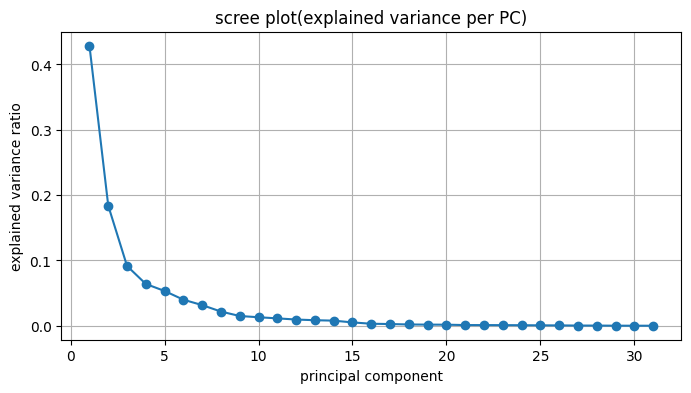

In [13]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(1,len(explained)+1), explained, marker='o', linestyle='-')
plt.title('scree plot(explained variance per PC)')
plt.xlabel('principal component')
plt.ylabel('explained variance ratio')
plt.grid(True)
plt.show()

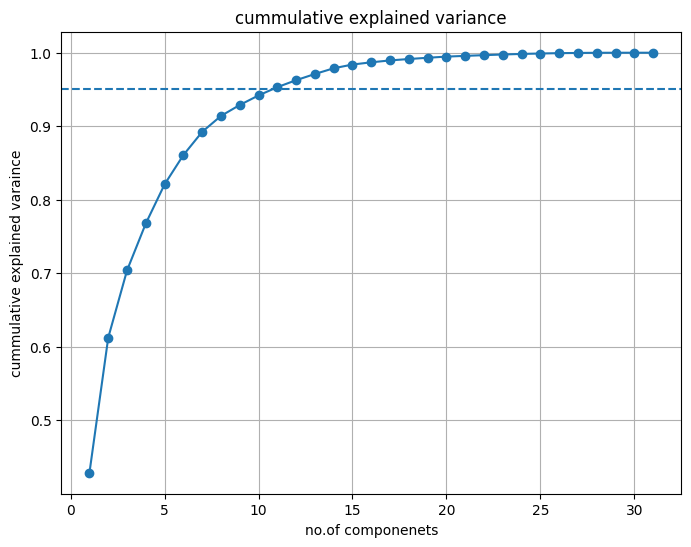

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(np.arange(1,len(cum_explained)+1), cum_explained, marker='o', linestyle='-')
plt.axhline(0.95, linestyle='--')
plt.title('cummulative explained variance')
plt.xlabel('no.of componenets')
plt.ylabel('cummulative explained varaince')
plt.grid(True)
plt.show()

In [15]:
pca= PCA(n_components=0.95, svd_solver='full')
x_reduced= pca.fit_transform(x_scaled)
print(x_scaled.shape)
print(x_reduced.shape)
print(np.sum(pca.explained_variance_ratio_))

(569, 31)
(569, 11)
0.9531680557191974


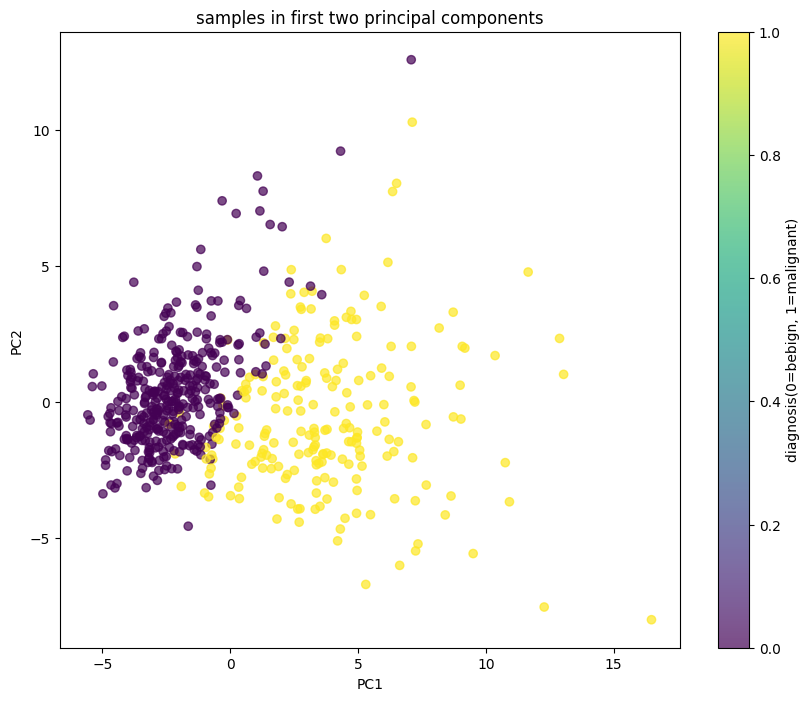

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(x_reduced[:,0], x_reduced[:,1], c=y, alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('samples in first two principal components')
plt.colorbar(label='diagnosis(0=bebign, 1=malignant)')
plt.show()

8) Biplot — loadings + scores (visualizing feature contributions)

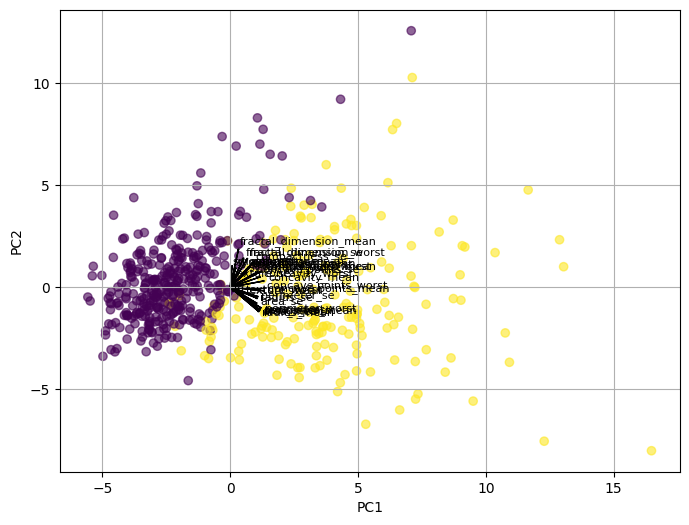

In [17]:
def biplot(scores, loadings, feature_names, pc1=0, pc2=1, scale_loadings=5):
    xs = scores[:, pc1]
    ys = scores[:, pc2]
    plt.figure(figsize=(8,6))
    plt.scatter(xs, ys, c=y, alpha=0.6)
    for i, (name, vec) in enumerate(zip(feature_names, loadings.T)):
        plt.arrow(0, 0, vec[pc1]*scale_loadings, vec[pc2]*scale_loadings,
                  head_width=0.05, head_length=0.05)
        plt.text(vec[pc1]*scale_loadings*1.15, vec[pc2]*scale_loadings*1.15, name, fontsize=8)
    plt.xlabel(f"PC{pc1+1}")
    plt.ylabel(f"PC{pc2+1}")
    plt.grid(True)
    plt.show()

feature_names = x.columns.tolist()
biplot(x_reduced, pca.components_, feature_names)


9) Reconstruct original data (approximation) & compute reconstruction error

In [28]:
x_approx= pca.inverse_transform(x_reduced)
x_approx_org= scaler.inverse_transform(x_approx)

mse= mean_squared_error(x,x_approx_org)
print('reconstruction MSE:',mse)

reconstruction MSE: 47849786017.970406


10) Use PCA inside a supervised pipeline (example: classification)

In [34]:
pipe= Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('clf',RandomForestClassifier(random_state=42))
])

param_grid={
    'pca__n_components':[2,5,10,15,20,25],
    'clf__n_estimators':[100],
    }

grid= GridSearchCV(pipe, param_grid,cv=5, scoring='accuracy', n_jobs=-1 )
x_train,x_test, y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)

grid.fit(x_train, y_train)
print('best fit param: ',grid.best_params_)
print('cv best score: ', grid.best_score_)

y_pred = grid.predict(x_test)
print('test_accuracy: ', accuracy_score(y_pred, y_test))
print('classification report: ', classification_report(y_pred, y_test))

best fit param:  {'clf__n_estimators': 100, 'pca__n_components': 5}
cv best score:  0.9626373626373625
test_accuracy:  0.956140350877193
classification report:                precision    recall  f1-score   support

           0       0.99      0.95      0.97        75
           1       0.90      0.97      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

##PCA + LDA

In [37]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, stratify=y, random_state=42)

In [38]:
pipe_pca_lda= Pipeline([
    ('scaler',StandardScaler()),
    ('pca', PCA(n_components=10)),
     ('lda', LinearDiscriminantAnalysis())
])

In [39]:
pipe_pca_lda.fit(x_train,y_train)
y_pred= pipe_pca_lda.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9473684210526315
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        72
           1       1.00      0.86      0.92        42

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



##PCA + Logistic Regression

In [24]:
pipe_pca_log=Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=8)),
    ('logreg',LogisticRegression(max_iter=1000, random_state=42))
])

In [25]:
pipe_pca_log.fit(x_train,y_train)
y_pred2= pipe_pca_log.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(classification_report(y_test,y_pred2))

0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



##pipeline + RandomForest



In [54]:
pipe_pca_rf= Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('rf', RandomForestClassifier(random_state=42))
])

In [55]:
pipe_pca_rf.fit(x_train,y_train)
y_pred3= pipe_pca_rf.predict(x_test)
print(accuracy_score( y_test, y_pred3))
print(classification_report( y_test, y_pred3))

0.9473684210526315
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



##Pipeline + SVM

In [48]:
from sklearn.svm import SVC

In [49]:
pipe_pca_svc= Pipeline([

    ("scaler", StandardScaler()),
    ("pca", PCA()),
    ("svc", SVC(random_state=42))
])

In [51]:
pipe_pca_svc.fit(x_train, y_train)
y_pred4= pipe_pca_svc.predict(x_test)
print(accuracy_score(y_test, y_pred4))
print(classification_report(y_test, y_pred4))

0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

